### Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
from pathlib import Path


with open("./config/settings.yaml", "r") as f:
    config = yaml.safe_load(f)

data_path = config["data"]["file_path"]
sheet_id = 4  # Choose which sheet to analyze
df = pd.read_excel(data_path, sheet_name=str(sheet_id)).dropna().iloc[1:, :]

print(f"Loaded Sheet {sheet_id} | Shape: {df.shape}")
df.head()

Loaded Sheet 4 | Shape: (3652, 5)


,Input1,Input2,Input3,Input4,Output
1,77.02224,76.73907,76.17273,76.17273,76.17273
2,76.73907,76.17273,76.17273,76.17273,77.02224
3,76.17273,76.17273,76.17273,77.02224,78.43809
4,76.17273,76.17273,77.02224,78.43809,79.57077
5,76.17273,77.02224,78.43809,79.57077,79.85394


In [2]:
print("=== Dataset Info ===")
df.info()

print("\n=== Summary Statistics ===")
display(df.describe().T.round(3))

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 1 to 3652
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Input1  3652 non-null   float64
 1   Input2  3652 non-null   float64
 2   Input3  3652 non-null   float64
 3   Input4  3652 non-null   float64
 4   Output  3652 non-null   float64
dtypes: float64(5)
memory usage: 142.8 KB

=== Summary Statistics ===


,count,mean,std,min,25%,50%,75%,max
Input1,3652.0,112.279,68.820,41.06,67.607,91.181,132.524,682.44
Input2,3652.0,112.275,68.823,41.06,67.394,91.181,132.524,682.44
Input3,3652.0,112.275,68.823,41.06,67.394,91.181,132.524,682.44
Input4,3652.0,112.272,68.824,41.06,67.394,91.181,132.524,682.44
Output,3652.0,112.268,68.827,41.06,67.394,91.181,132.524,682.44


#### Correlation Matrix

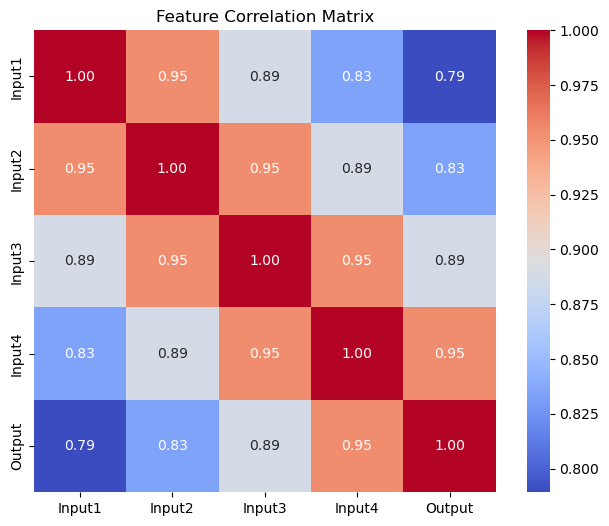

In [3]:
plt.figure(figsize=(8, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation Matrix")
plt.show()


#### Distribution

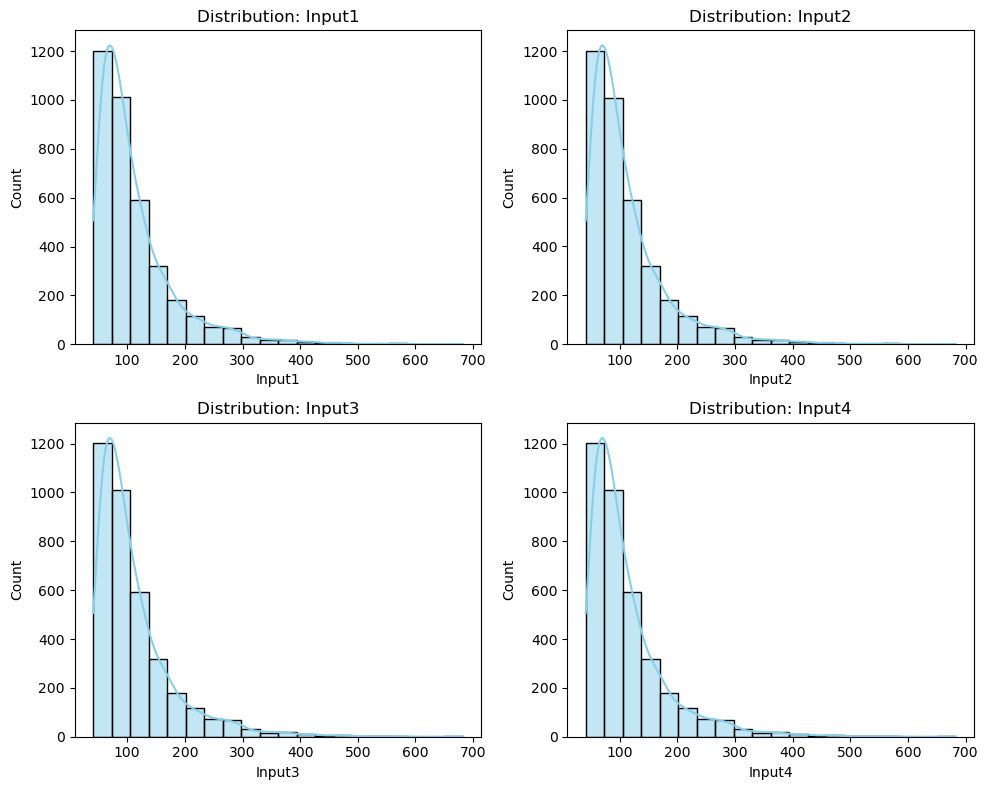

In [4]:
num_cols = df.select_dtypes(include=np.number).columns

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(num_cols[:4]):  # Plot first 4 numeric columns
    sns.histplot(df[col], bins=20, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f"Distribution: {col}")
plt.tight_layout()
plt.show()


#### Pairwise Scatter Plots

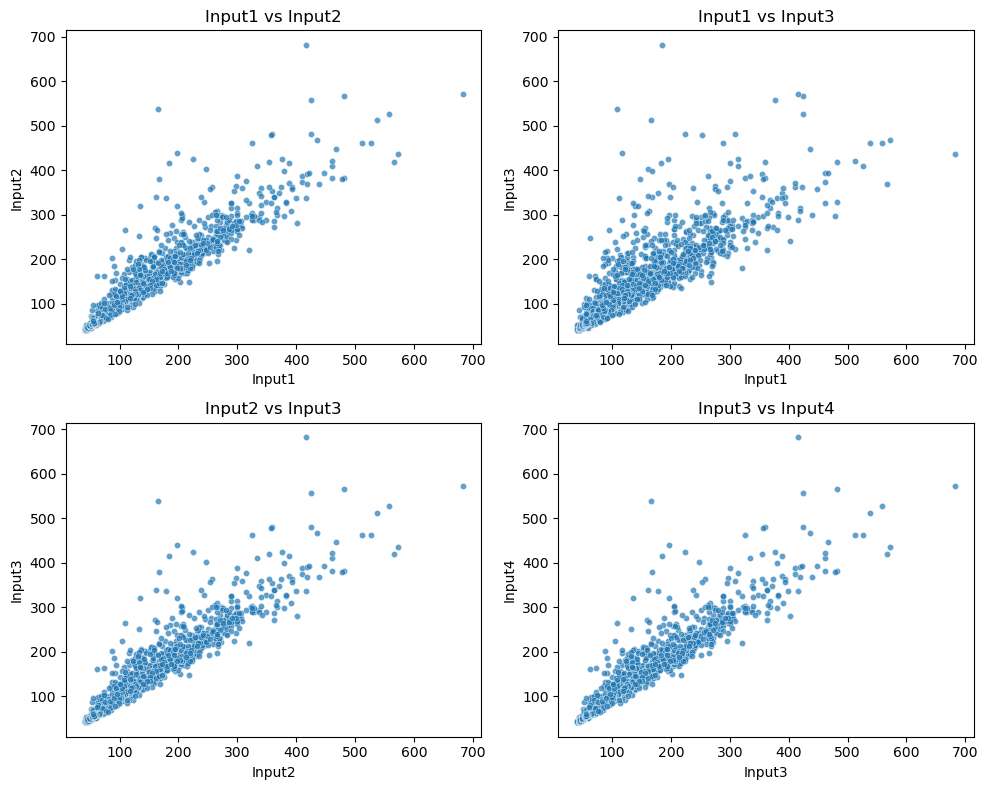

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

pairs = [(num_cols[0], num_cols[1]), (num_cols[0], num_cols[2]),
         (num_cols[1], num_cols[2]), (num_cols[2], num_cols[3])]

for i, (x, y) in enumerate(pairs):
    sns.scatterplot(x=df[x], y=df[y], s=20, alpha=0.7, ax=axes[i])
    axes[i].set_xlabel(x)
    axes[i].set_ylabel(y)
    axes[i].set_title(f"{x} vs {y}")
plt.tight_layout()
plt.show()


#### Relationship with Target

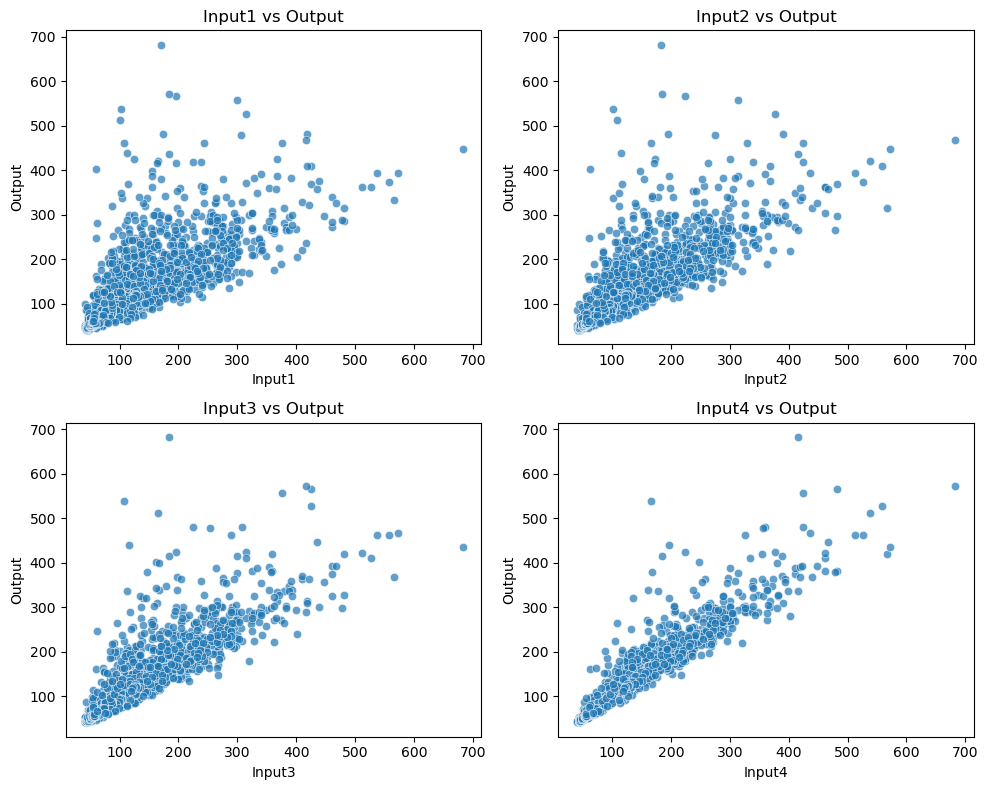

In [6]:
target_col = df.columns[-1]

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(num_cols[:4]):
    sns.scatterplot(x=df[col], y=df[target_col], alpha=0.7, ax=axes[i])
    axes[i].set_title(f"{col} vs {target_col}")
plt.tight_layout()
plt.show()


#### Correlation with Target Feature

C:\Users\Rasoul\AppData\Local\Temp\ipykernel_16828\2994370563.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_target.values, y=corr_target.index, palette="Blues_r")


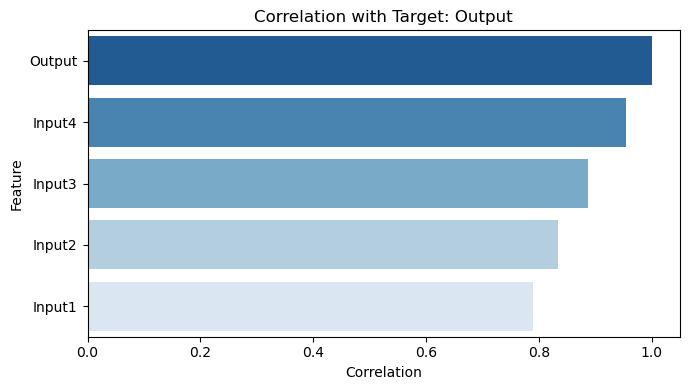

In [7]:
corr_target = corr[target_col].sort_values(ascending=False)
plt.figure(figsize=(7, 4))
sns.barplot(x=corr_target.values, y=corr_target.index, palette="Blues_r")
plt.title(f"Correlation with Target: {target_col}")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [8]:
eda_dir = Path("./results/eda")
eda_dir.mkdir(parents=True, exist_ok=True)
df.describe().to_excel(eda_dir / f"{config['data']['name']}_Sheet{sheet_id}_summary.xlsx")

print(f"saved to: {eda_dir}")

saved to: results\eda


### Prediction Results Visualization

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# --- Font setup ---
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['legend.fontsize'] = 10

# --- Load all prediction files ---
pred_dir = Path(config["output"]["predictions_dir"])
data_name = config["data"]["name"]

files = list(pred_dir.glob(f"{data_name}_Sheet*_predictions.xlsx"))

df_list = []
for file in files:
    sheet_id = int(file.stem.split("Sheet")[1].split("_")[0])
    df = pd.read_excel(file)
    df["Sheet"] = sheet_id
    df_list.append(df)

all_preds = pd.concat(df_list, ignore_index=True)
print(f"Combined all predictions. Shape = {all_preds.shape}")
display(all_preds.head())


Combined all predictions. Shape = (3653, 7)


,Real,GBR,SVR,KNN,VotingRegressor,AOA_VR,Sheet
0,76.17273,76.648422,75.134840,76.965606,76.249623,77.782891,4
1,76.17273,76.648422,74.962947,75.889560,75.833643,77.782891,4
2,77.02224,76.648422,74.876133,75.889560,75.804705,77.782891,4
3,78.43809,76.648422,75.395207,77.475312,76.506314,77.782891,4
4,79.57077,79.046187,76.517999,78.777894,78.114027,78.690935,4


C:\Users\Rasoul\AppData\Local\Temp\ipykernel_16828\2319022765.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


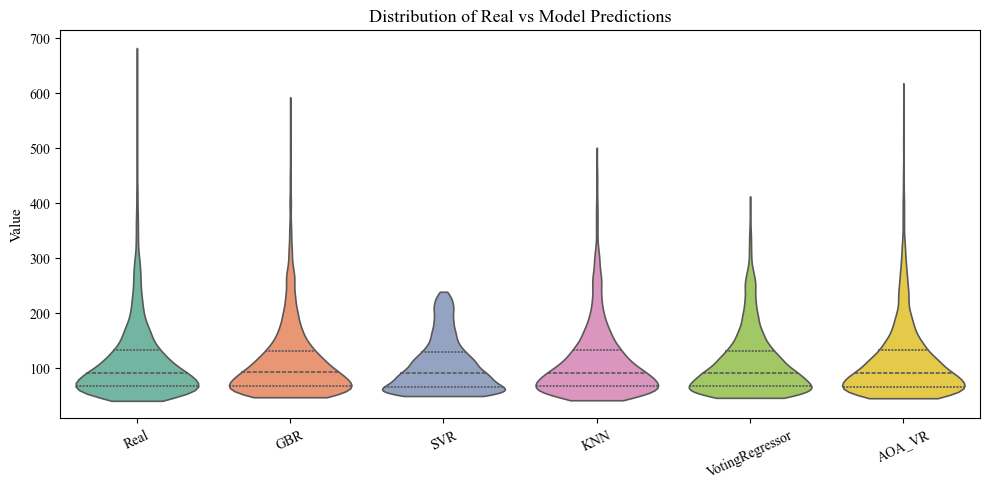

In [10]:
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# --- Font and style ---
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['axes.labelsize'] = 11

# Create directory
plot_dir = Path("./results/prediction_plots")
plot_dir.mkdir(parents=True, exist_ok=True)

# Melt data for plotting
melted = all_preds.melt(id_vars=["Sheet"], var_name="Source", value_name="Value")

# Plot violin
fig, ax = plt.subplots(figsize=(10, 5))
sns.violinplot(
    data=melted,
    x="Source", y="Value",
    palette="Set2", cut=0, inner="quartile", linewidth=1.2,
    ax=ax
)

ax.set_title("Distribution of Real vs Model Predictions", fontsize=13)
ax.set_xlabel("")
ax.set_ylabel("Value")
plt.xticks(rotation=25, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Save before showing
save_path = plot_dir / "Violin.png"
fig.savefig(save_path, dpi=400, bbox_inches="tight")

plt.show()
plt.close(fig)


C:\Users\Rasoul\AppData\Local\Temp\ipykernel_16828\1472171463.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved at: results\prediction_plots\Scatter.png


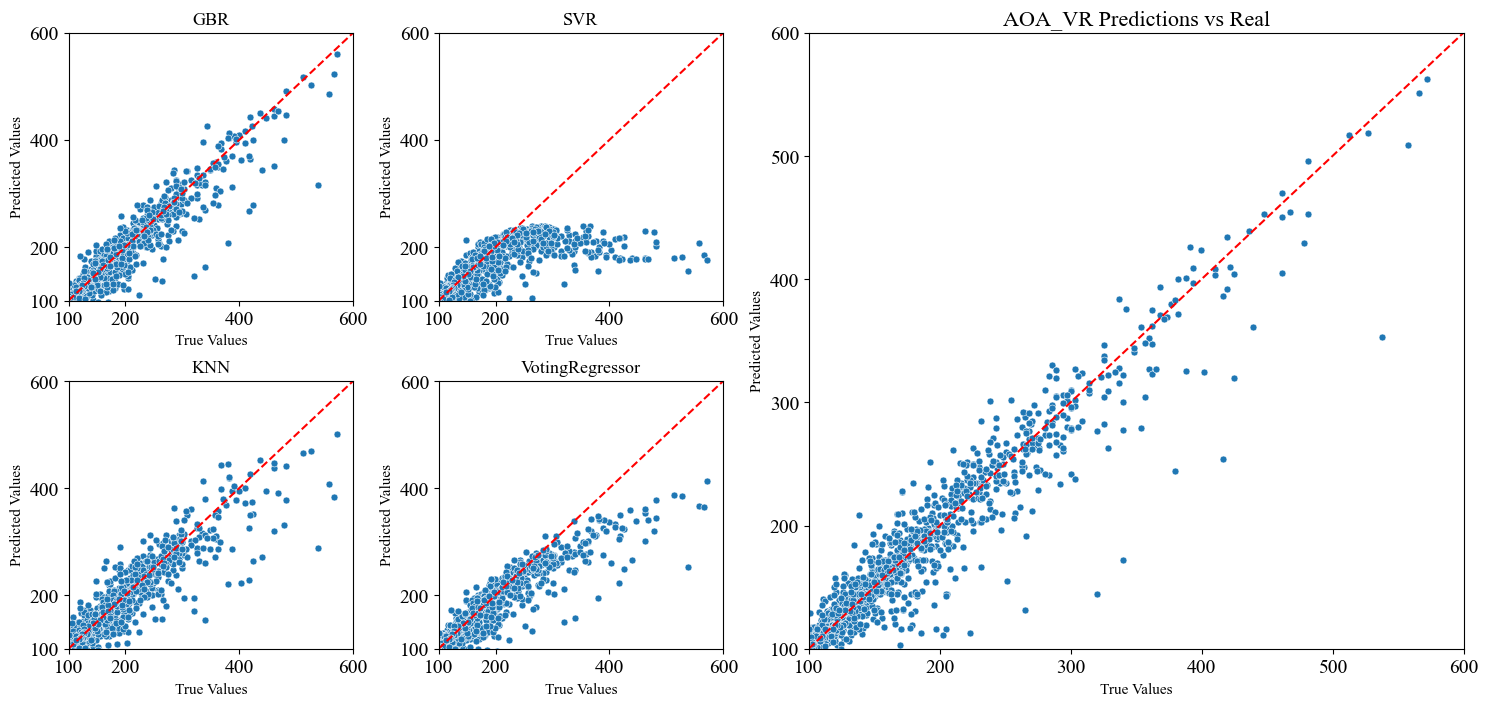

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

plot_dir = Path("./results/prediction_plots")
plot_dir.mkdir(parents=True, exist_ok=True)

models = ["GBR", "SVR", "KNN", "VotingRegressor", "AOA_VR"]

# Example structure: you already have `all_preds` DataFrame
# containing columns ["Real", "GBR", "SVR", "KNN", "VotingRegressor", "AOA_VR"]

# --- Layout: 2×4 grid, last 2 columns combined for AOA_VR ---
fig = plt.figure(figsize=(18, 8))
grid = plt.GridSpec(2, 4, figure=fig, wspace=0.3, hspace=0.3)

axes = [
    fig.add_subplot(grid[0, 0]),  # GBR
    fig.add_subplot(grid[0, 1]),  # SVR
    fig.add_subplot(grid[1, 0]),  # KNN
    fig.add_subplot(grid[1, 1]),  # VotingRegressor
]
ax_big = fig.add_subplot(grid[:, 2:])  # Optimized VR (wide column)

# Common axis limits
xlim = (100, 600)
ylim = (100, 600)

# Small subplots
for ax, model in zip(axes, models[:-1]):
    sns.scatterplot(x=all_preds["Real"], y=all_preds[model], ax=ax, s=25)
    ax.plot([100, 600], [100, 600], 'r--', lw=1.5)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xticks([100, 200, 400, 600])
    ax.set_yticks([100, 200, 400, 600])
    ax.set_title(model)
    ax.set_xlabel("True Values")
    ax.set_ylabel("Predicted Values")

# Large subplot for Optimized VR
sns.scatterplot(x=all_preds["Real"], y=all_preds["AOA_VR"], ax=ax_big, s=25)
ax_big.plot([100, 600], [100, 600], 'r--', lw=1.5)
ax_big.set_xlim(xlim)
ax_big.set_ylim(ylim)
ax_big.set_title("AOA_VR Predictions vs Real", fontsize=16)
ax_big.set_xlabel("True Values")
ax_big.set_ylabel("Predicted Values")

plt.tight_layout()
save_path = plot_dir / "Scatter.png"
fig.savefig(save_path, dpi=400, bbox_inches="tight")
print(f"Saved at: {save_path}")

plt.show()
plt.close(fig)


Time series grid saved at: results\prediction_plots\TimeSeries_Grid.png


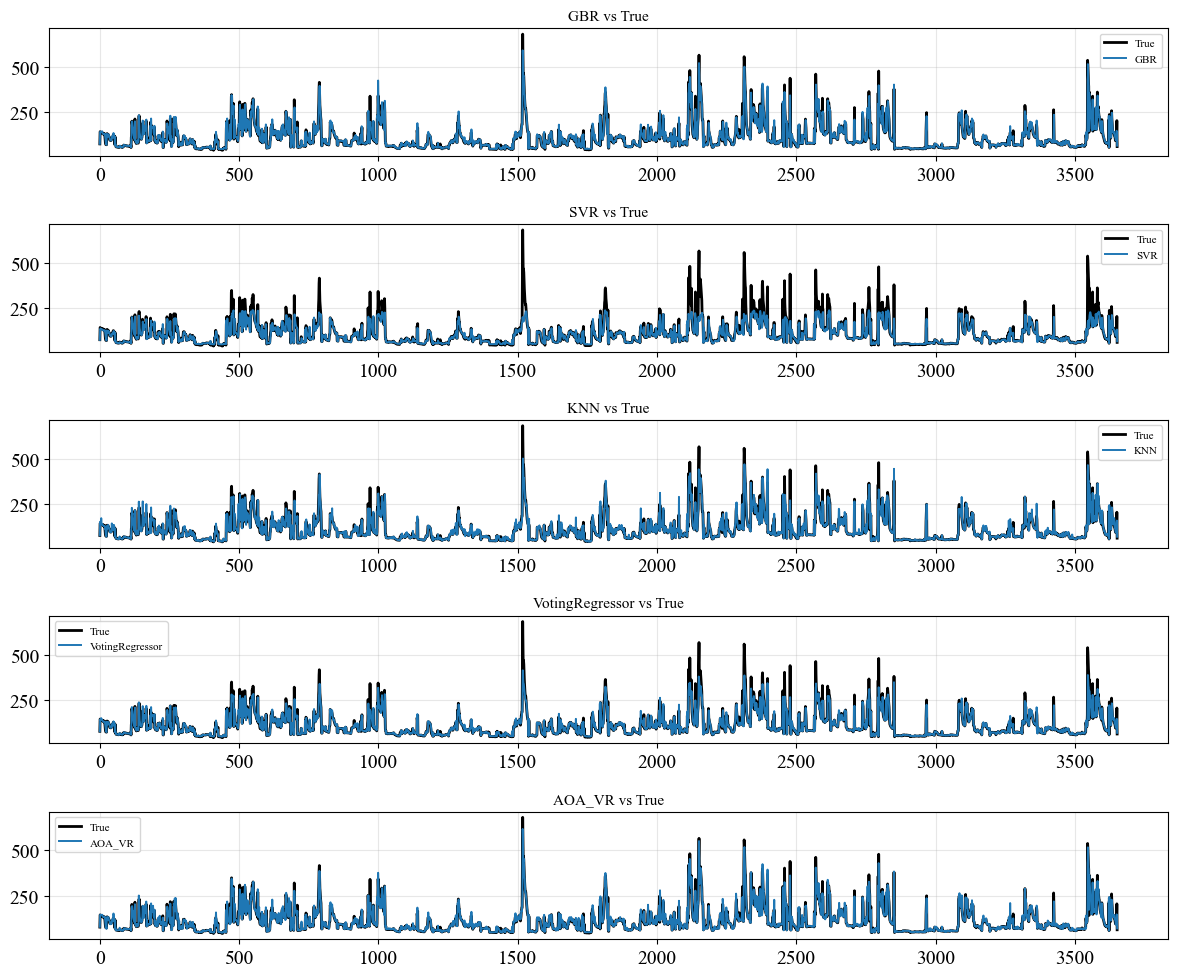

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14


# Create folder if not exists
plot_dir = Path("./results/prediction_plots")
plot_dir.mkdir(parents=True, exist_ok=True)

# Sort by time if needed
all_preds = all_preds.sort_values(by="Sheet").reset_index(drop=True)

# Define models
models = ["GBR", "SVR", "KNN", "VotingRegressor", "AOA_VR"]

fig, axes = plt.subplots(5, 1, figsize=(12, 10))
axes = axes.flatten()

for i, m in enumerate(models):
    axes[i].plot(all_preds["Real"], color="black", label="True", linewidth=2)
    axes[i].plot(all_preds[m], label=m, linewidth=1.4)
    axes[i].set_title(f"{m} vs True", fontsize=11)
    axes[i].grid(alpha=0.3)
    axes[i].legend(fontsize=8)


plt.tight_layout()
save_path = plot_dir / "TimeSeries_Grid.png"
fig.savefig(save_path, dpi=400, bbox_inches="tight")
print(f"Time series grid saved at: {save_path}")

plt.show()
plt.close(fig)